In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import os

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
     

from matplotlib.image import imread

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
train_path = '/kaggle/input/animals-dataset/animal dataset/train'
test_path = '/kaggle/input/animals-dataset/animal dataset/val'

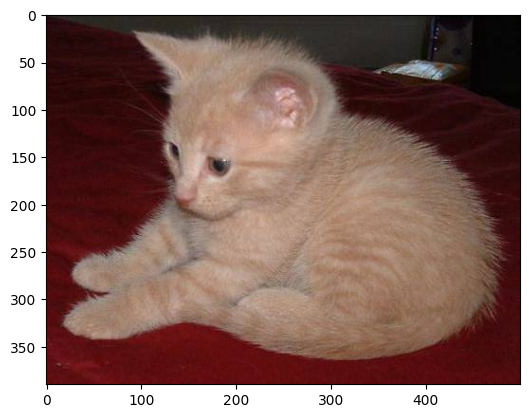

In [5]:
plt.imshow(imread('/kaggle/input/animals-dataset/animal dataset/train/cats/cats_00004.jpg'))

In [9]:
imread('/kaggle/input/animals-dataset/animal dataset/train/cats/cats_00025.jpg').shape

(225, 350, 3)

In [10]:
dim1 = []
dim2 = []
for image_filename in os.listdir(train_path+'/cats'):

  if image_filename[-3:] == 'jpg':
    img = imread(train_path+'/cats'+'/'+image_filename)
    d1, d2 = img.shape[:2]
    dim1.append(d1)
    dim2.append(d2)

In [11]:
np.mean(dim1), np.mean(dim2)

(352.1075, 405.865)

In [35]:
image_shape = (180,180,3)

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
     

image_gen = ImageDataGenerator(rescale=1/255,rotation_range=10, width_shift_range=0.1, height_shift_range=0.1,shear_range=0.1,horizontal_flip=True,fill_mode='nearest')
     

image_gen.flow_from_directory(train_path)

Found 2400 images belonging to 3 classes.


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
     

model = Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3), input_shape=(image_shape), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=(image_shape), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=(image_shape), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 178, 178, 128)     3584      
                                                                 
 batch_normalization_3 (Bat  (None, 178, 178, 128)     512       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        73792     
                                                                 
 batch_normalization_4 (Bat  (None, 87, 87, 64)        256       
 chNormalization)                                                
                                                      

In [37]:

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)
batch_size=16
     

train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode='rgb', batch_size=16, class_mode='categorical')
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb', batch_size=16, class_mode='categorical', shuffle=False)

Found 2400 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [38]:
train_image_gen.class_indices

{'cats': 0, 'dogs': 1, 'panda': 2}

In [39]:
results = model.fit_generator(train_image_gen, epochs=10, validation_data=test_image_gen,
          callbacks=[early_stop])

/tmp/ipykernel_26/2518578130.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen, epochs=10, validation_data=test_image_gen,


Epoch 1/10
150/150 [==============================] - 35s 215ms/step - loss: 3.6451 - accuracy: 0.5587 - val_loss: 2.9009 - val_accuracy: 0.3333
Epoch 2/10
150/150 [==============================] - 24s 162ms/step - loss: 0.8146 - accuracy: 0.6208 - val_loss: 3.7706 - val_accuracy: 0.3300
Epoch 3/10
150/150 [==============================] - 25s 164ms/step - loss: 0.7647 - accuracy: 0.6371 - val_loss: 1.3348 - val_accuracy: 0.3933
Epoch 4/10
150/150 [==============================] - 25s 164ms/step - loss: 0.8586 - accuracy: 0.6296 - val_loss: 2.1281 - val_accuracy: 0.4000
Epoch 5/10
150/150 [==============================] - 25s 165ms/step - loss: 0.7706 - accuracy: 0.6383 - val_loss: 0.8395 - val_accuracy: 0.6000
Epoch 6/10
150/150 [==============================] - 27s 180ms/step - loss: 0.6906 - accuracy: 0.6708 - val_loss: 1.1056 - val_accuracy: 0.5933
Epoch 7/10
150/150 [==============================] - 24s 163ms/step - loss: 0.7023 - accuracy: 0.6579 - val_loss: 2.3957 - val_ac

In [40]:
results2 = model.fit_generator(train_image_gen, initial_epoch=7,epochs=10, validation_data=test_image_gen,
          callbacks=[early_stop])

Epoch 8/10


/tmp/ipykernel_26/2505751030.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results2 = model.fit_generator(train_image_gen, initial_epoch=7,epochs=10, validation_data=test_image_gen,


150/150 [==============================] - 25s 166ms/step - loss: 0.7295 - accuracy: 0.6692 - val_loss: 0.6804 - val_accuracy: 0.6933
Epoch 9/10
150/150 [==============================] - 24s 163ms/step - loss: 0.6540 - accuracy: 0.6896 - val_loss: 0.6479 - val_accuracy: 0.6933
Epoch 10/10
150/150 [==============================] - 24s 162ms/step - loss: 0.7070 - accuracy: 0.6717 - val_loss: 0.7331 - val_accuracy: 0.6633


In [43]:
results3 = model.fit_generator(train_image_gen, initial_epoch=10,epochs=15, validation_data=test_image_gen)

/tmp/ipykernel_26/2796097753.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results3 = model.fit_generator(train_image_gen, initial_epoch=10,epochs=15, validation_data=test_image_gen)


Epoch 11/15
150/150 [==============================] - 25s 165ms/step - loss: 0.6387 - accuracy: 0.6983 - val_loss: 0.6717 - val_accuracy: 0.6567
Epoch 12/15
150/150 [==============================] - 24s 163ms/step - loss: 0.6422 - accuracy: 0.7025 - val_loss: 2.4789 - val_accuracy: 0.4067
Epoch 13/15
150/150 [==============================] - 24s 163ms/step - loss: 0.6119 - accuracy: 0.7050 - val_loss: 0.6390 - val_accuracy: 0.7167
Epoch 14/15
150/150 [==============================] - 24s 162ms/step - loss: 0.5747 - accuracy: 0.7275 - val_loss: 0.7537 - val_accuracy: 0.6933
Epoch 15/15
150/150 [==============================] - 25s 167ms/step - loss: 0.5890 - accuracy: 0.7242 - val_loss: 0.5676 - val_accuracy: 0.7533


In [44]:
from tensorflow.keras.preprocessing import image

In [108]:
array=[]
for i in range(len(os.listdir('/kaggle/input/animals-dataset/animal dataset/test/cats'))):
    X = os.listdir('/kaggle/input/animals-dataset/animal dataset/test/cats')[i]
    arr3 = image.load_img('/kaggle/input/animals-dataset/animal dataset/test/cats/'+X, target_size=image_shape)
    arr4 = image.img_to_array(arr3)
    arr4 = np.expand_dims(arr4/255, axis=0)
    array.append(np.argmax(model.predict(arr4)))
print(array)
       

1/1 [==============================] - 0s 18ms/step
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]


In [109]:
array2=[]
for i in range(len(os.listdir('/kaggle/input/animals-dataset/animal dataset/test/dogs'))):
    X = os.listdir('/kaggle/input/animals-dataset/animal dataset/test/dogs')[i]
    arr3 = image.load_img('/kaggle/input/animals-dataset/animal dataset/test/dogs/'+X, target_size=image_shape)
    arr4 = image.img_to_array(arr3)
    arr4 = np.expand_dims(arr4/255, axis=0)
    array2.append(np.argmax(model.predict(arr4)))

print(array2)
       

1/1 [==============================] - 0s 19ms/step
[1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1]


In [110]:
array3=[]
for i in range(len(os.listdir('/kaggle/input/animals-dataset/animal dataset/test/panda'))):
    X = os.listdir('/kaggle/input/animals-dataset/animal dataset/test/panda')[i]
    arr3 = image.load_img('/kaggle/input/animals-dataset/animal dataset/test/panda/'+X, target_size=image_shape)
    arr4 = image.img_to_array(arr3)
    arr4 = np.expand_dims(arr4/255, axis=0)
    array3.append(np.argmax(model.predict(arr4)))
print(array3)

1/1 [==============================] - 0s 17ms/step
[2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2]
